<a href="https://colab.research.google.com/github/Henriquerezer/Machine_Learning/blob/main/COURSERA/IBM/REGRESSION/EXERCISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**



1.   Age: age of the patient [years]
2.   Sex: sex of the patient [M: Male, F: Female]
3.   ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.   RestingBP: resting blood pressure [mm Hg]
5.   Cholesterol: serum cholesterol [mm/dl]
6.   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.   MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.  Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.  ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.  HeartDisease: output class [1: heart disease, 0: Normal]

**Citation**

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.



---






**Objective**

The objective of this analysis is to evaluate changes in the use of regularization in the prediction of heart failure.


---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
camiho = 'https://raw.githubusercontent.com/Henriquerezer/Machine_Learning/main/COURSERA/IBM/REGRESSION/heart.csv'
data = pd.read_csv(camiho)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.shape, data.dtypes

((918, 12), Age                 int64
 Sex                object
 ChestPainType      object
 RestingBP           int64
 Cholesterol         int64
 FastingBS           int64
 RestingECG         object
 MaxHR               int64
 ExerciseAngina     object
 Oldpeak           float64
 ST_Slope           object
 HeartDisease        int64
 dtype: object)

In [ ]:
#Análise dos dados
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


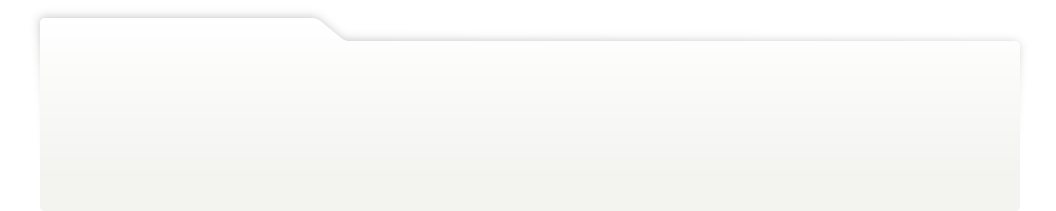
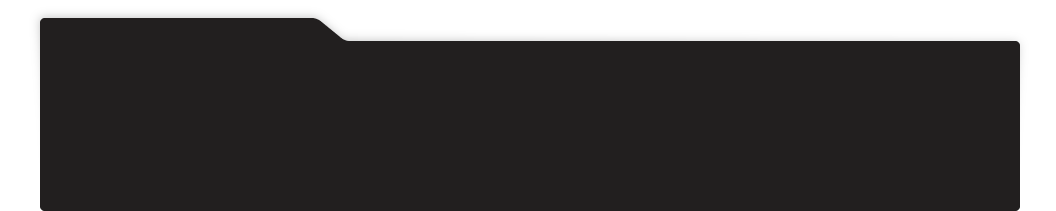
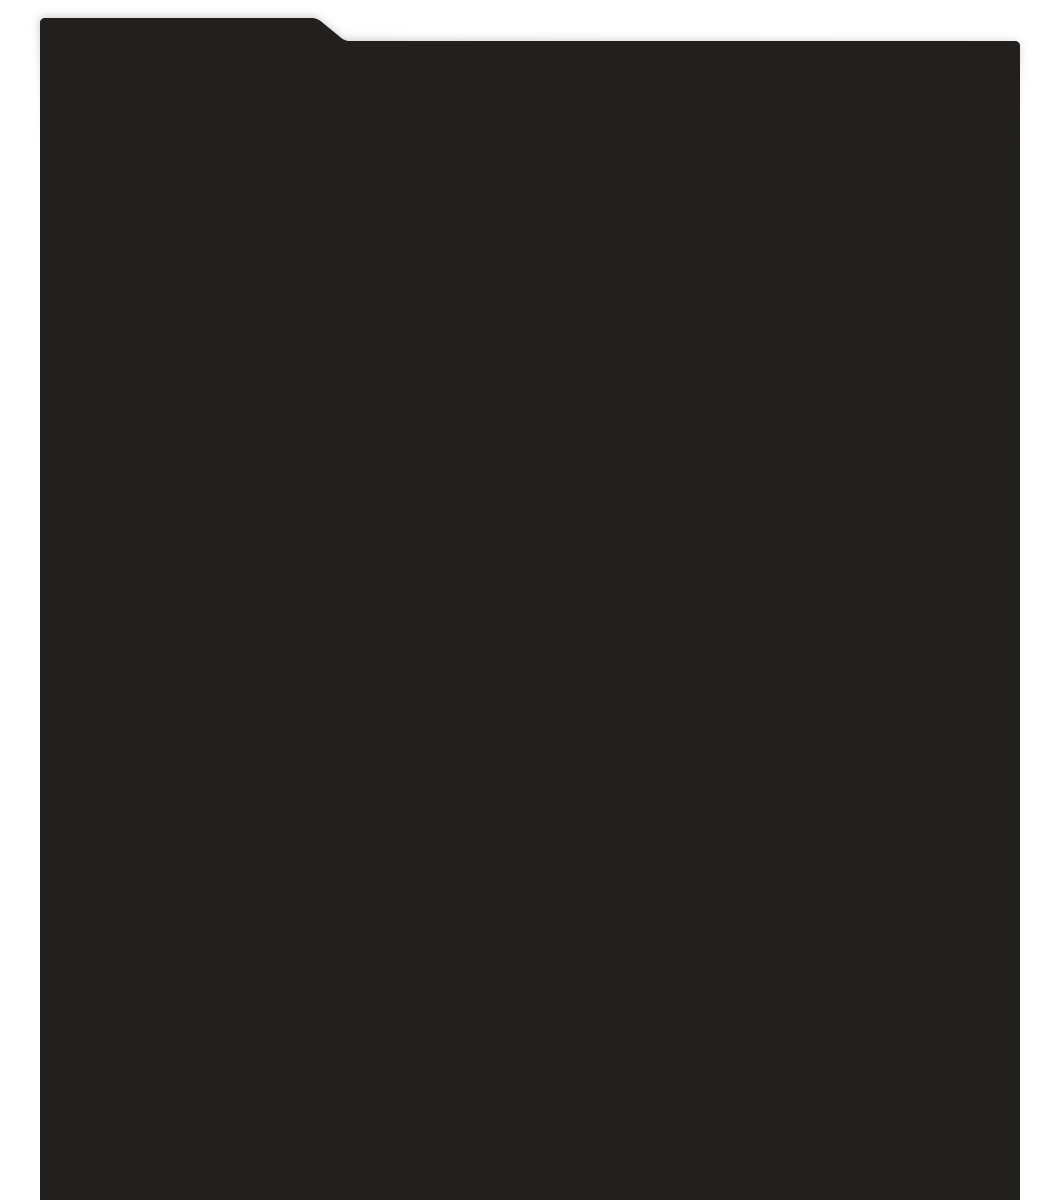
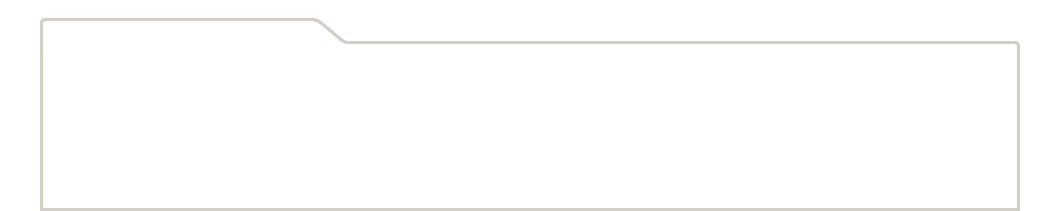
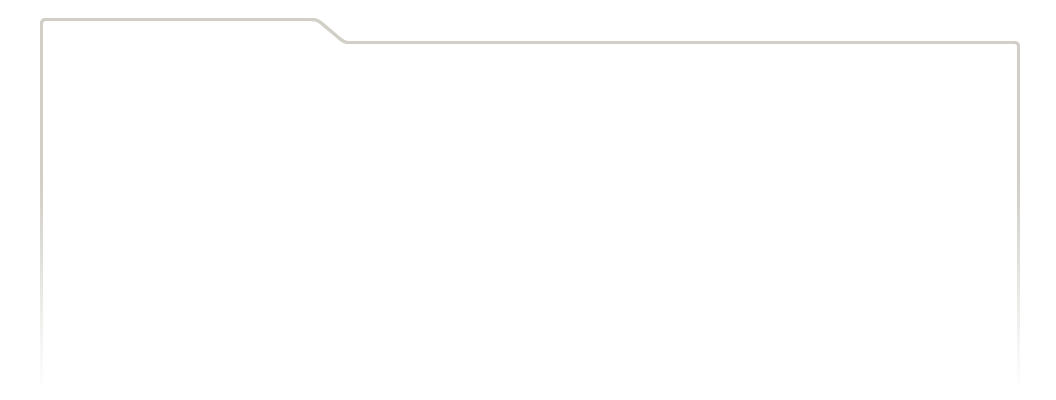
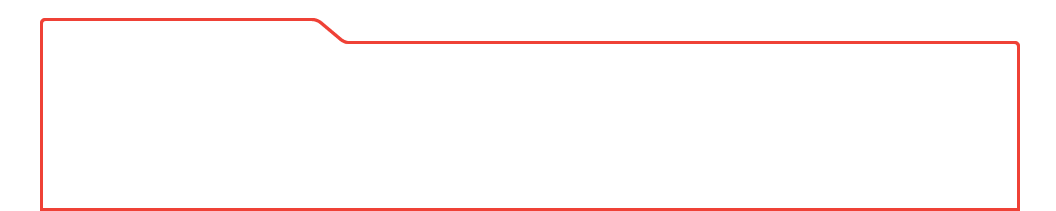
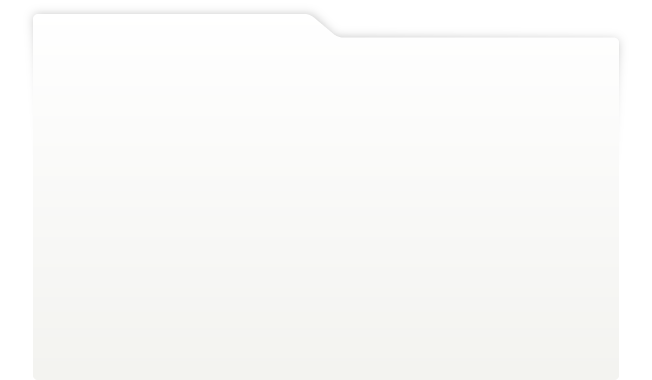
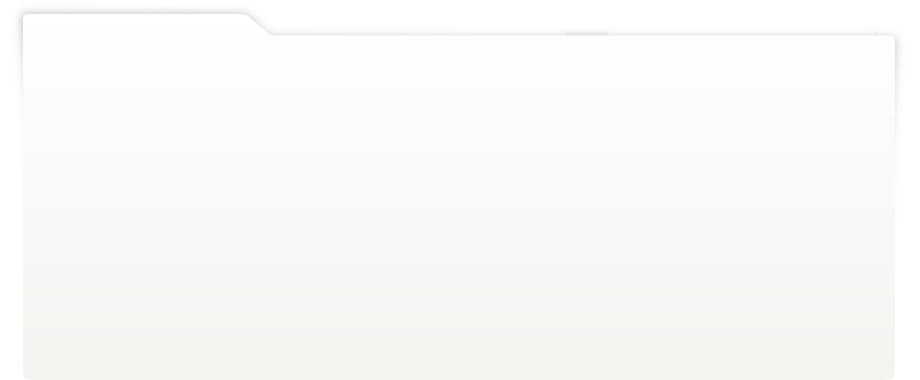
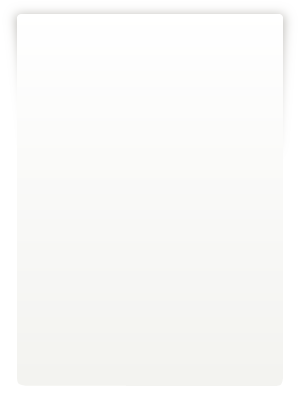
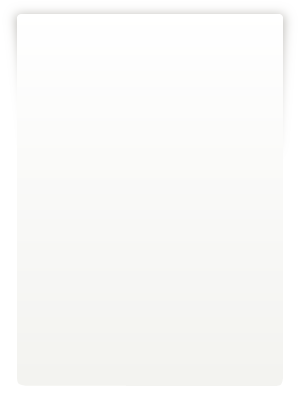
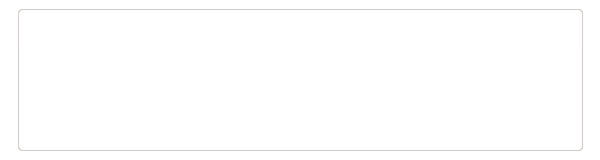
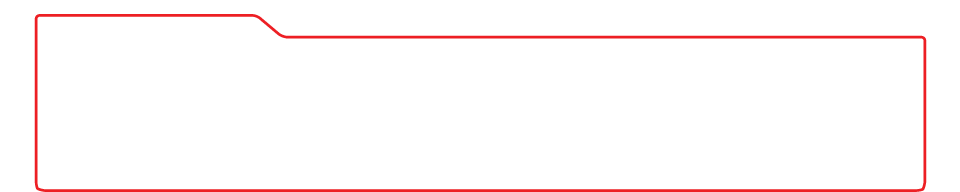
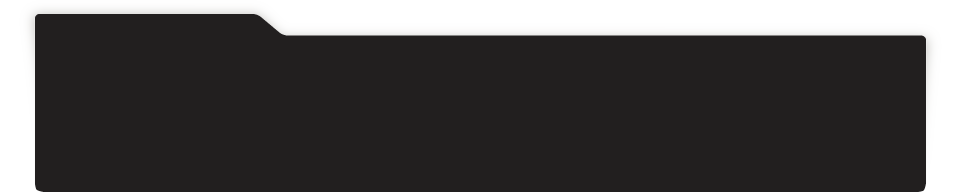
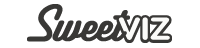
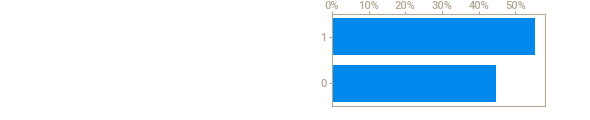
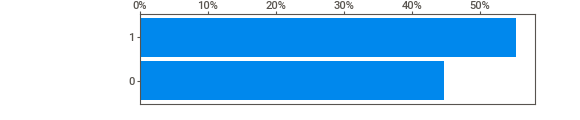
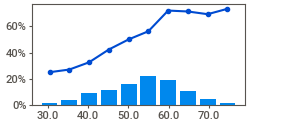
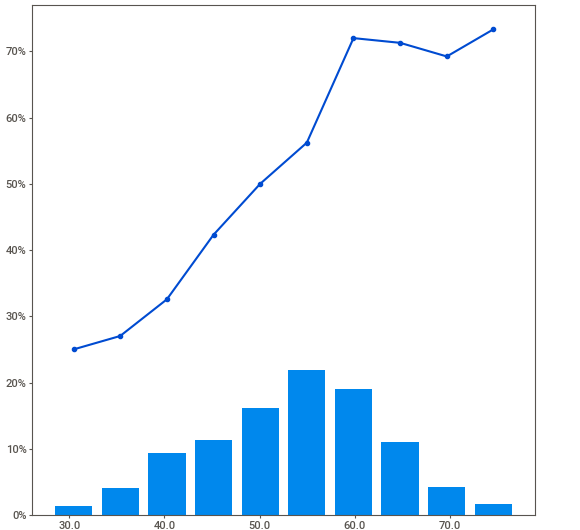
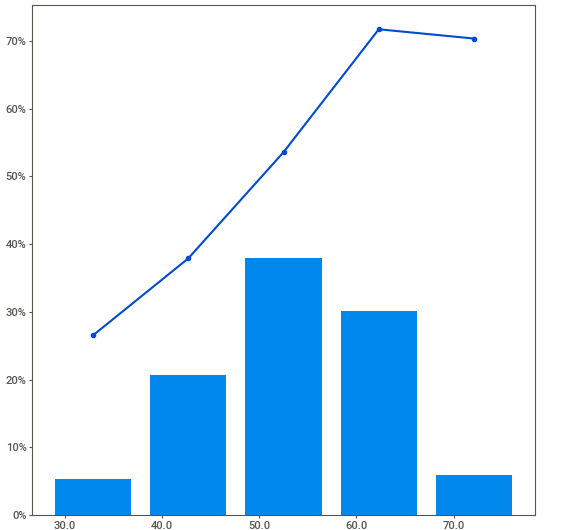
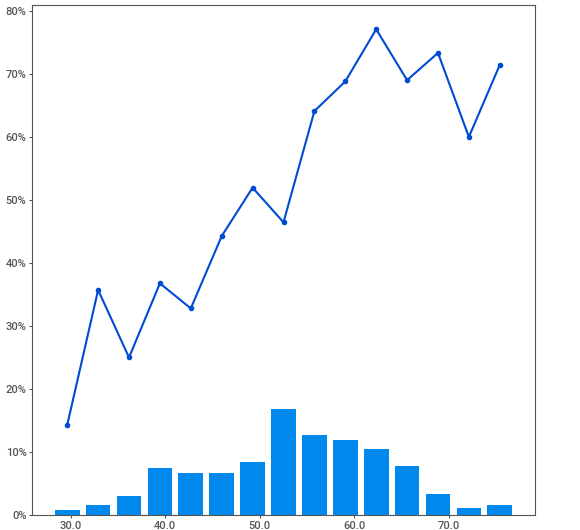
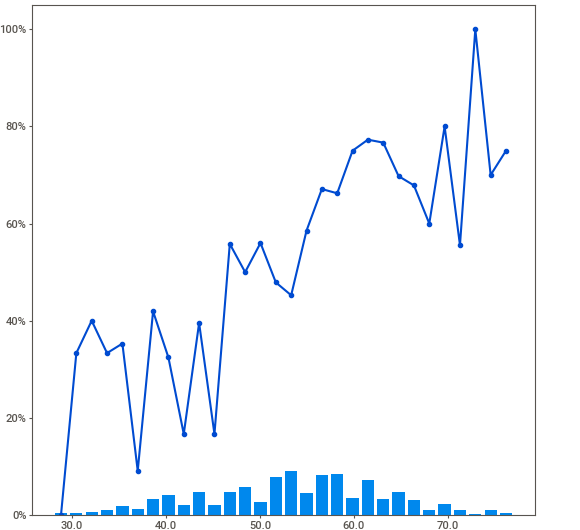
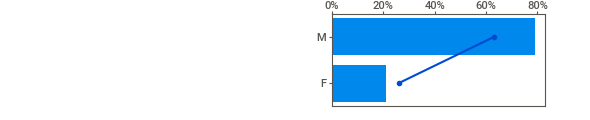
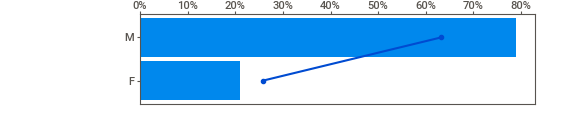
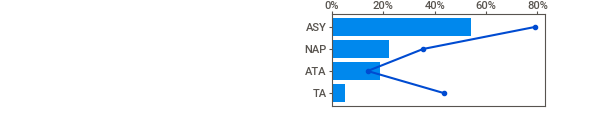
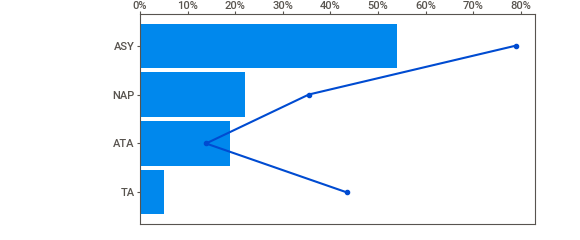
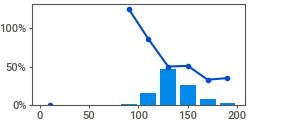
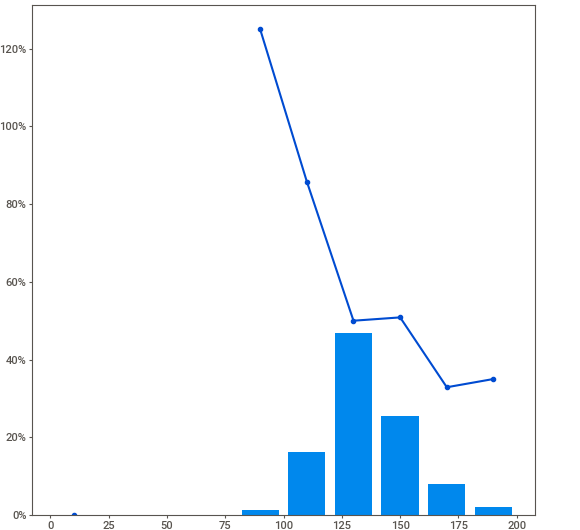
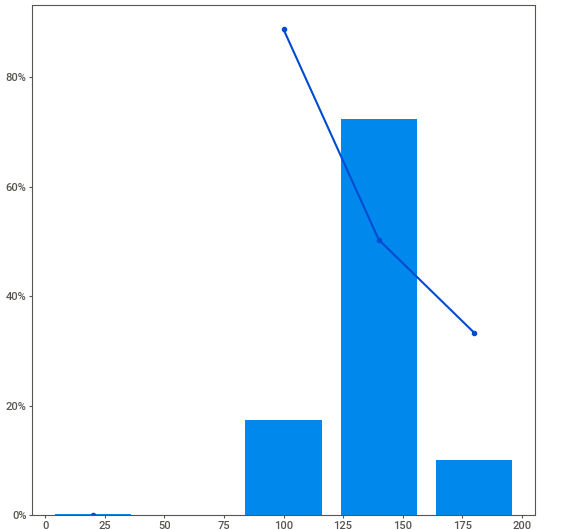
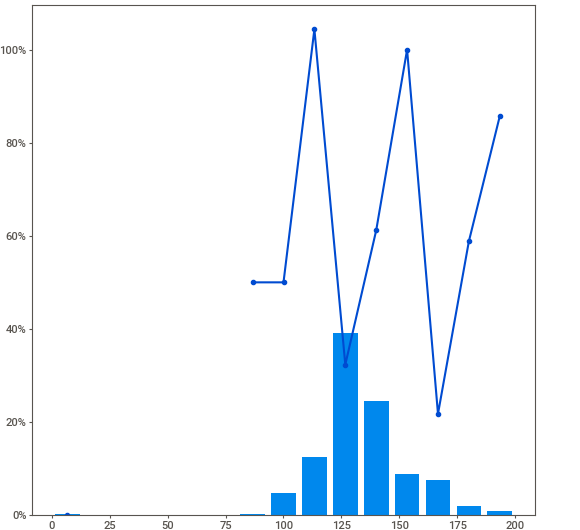
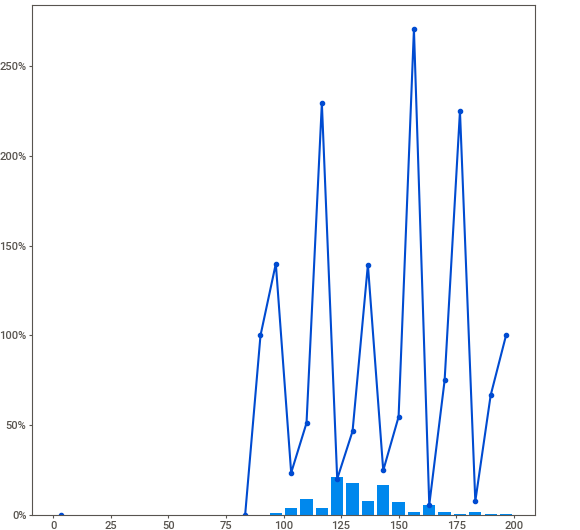
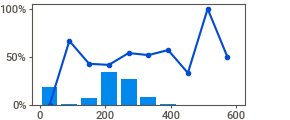
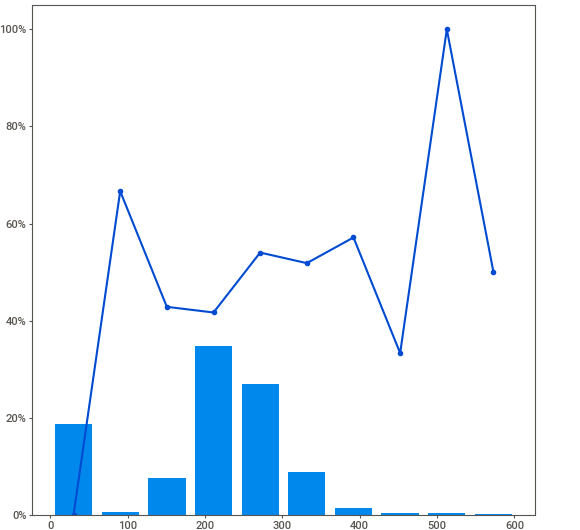
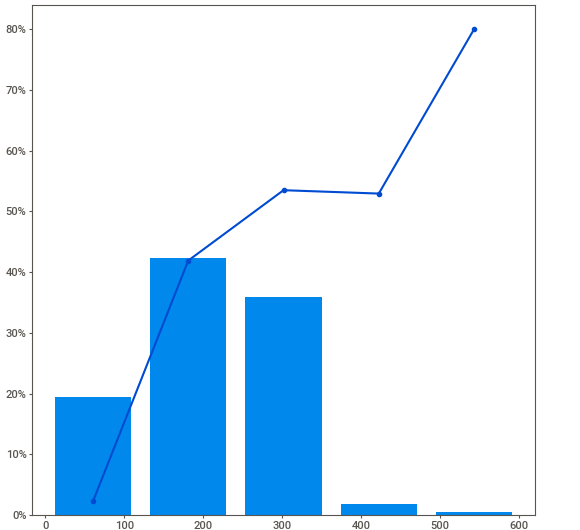
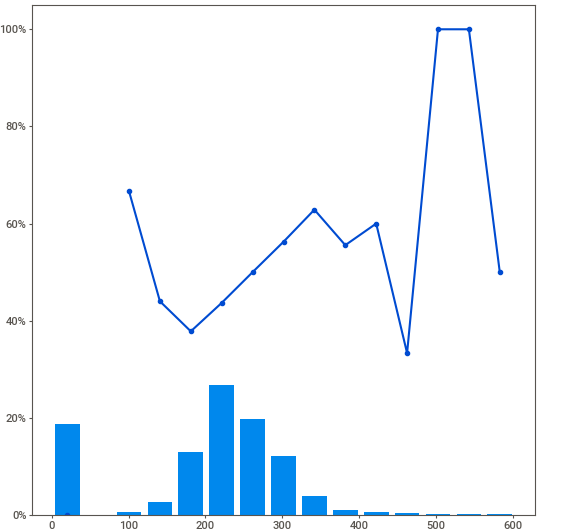
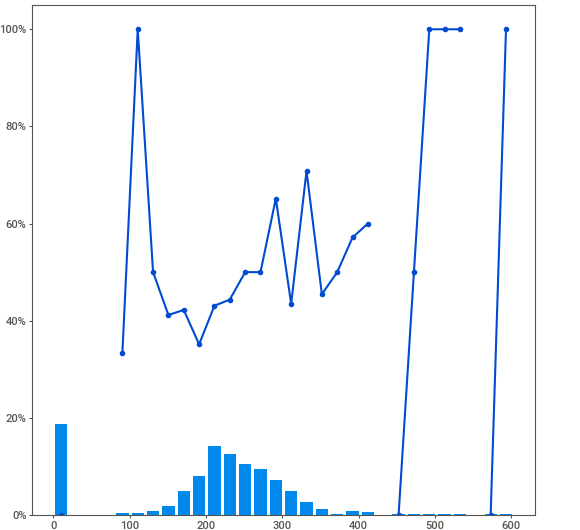
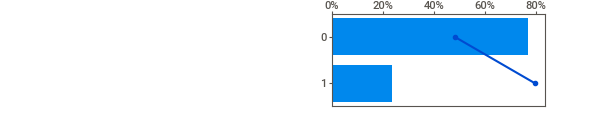
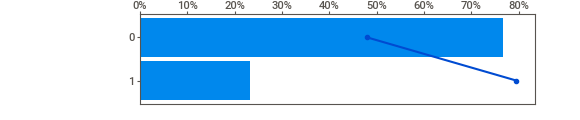
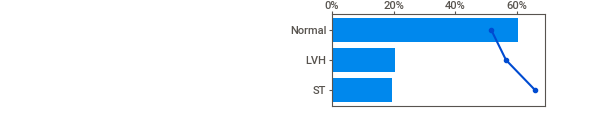
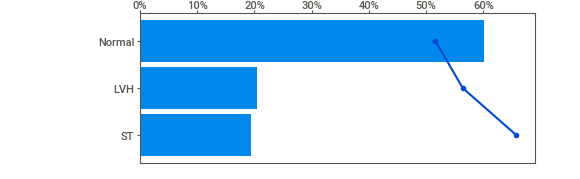
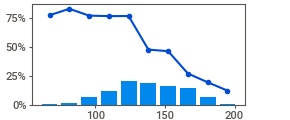
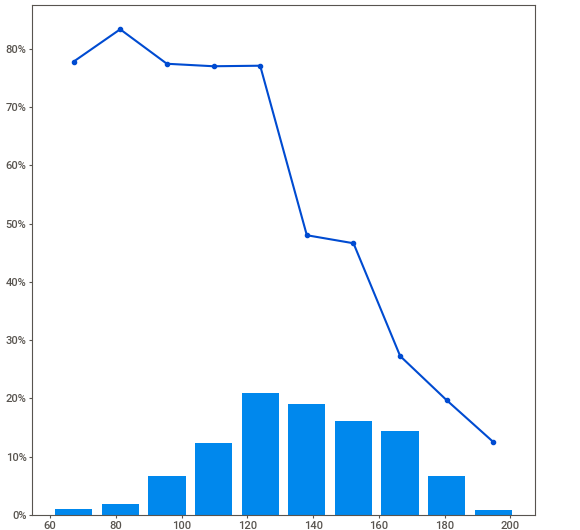
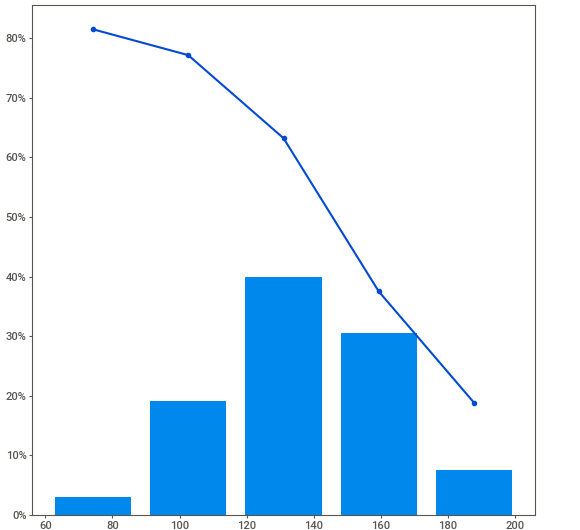
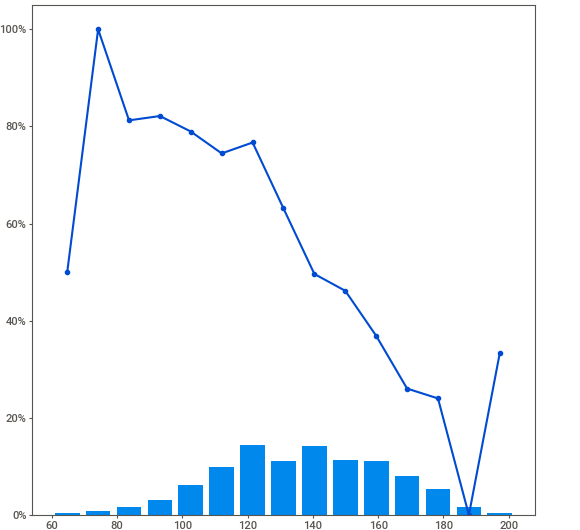
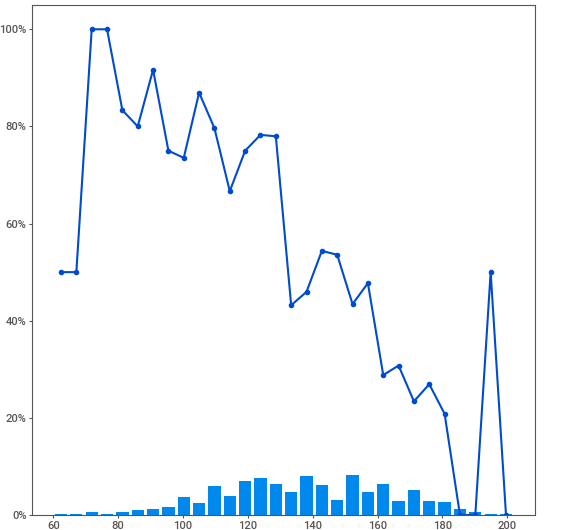
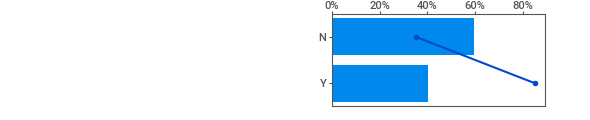
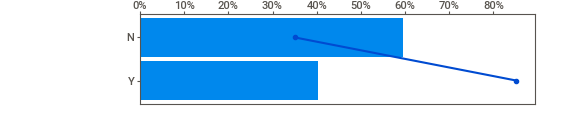
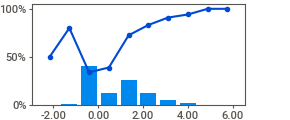
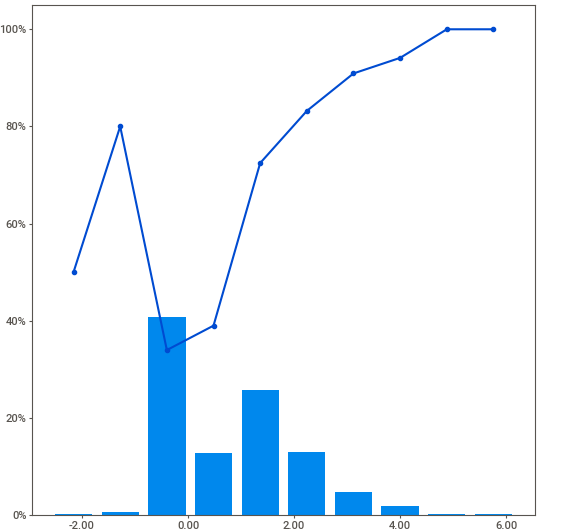
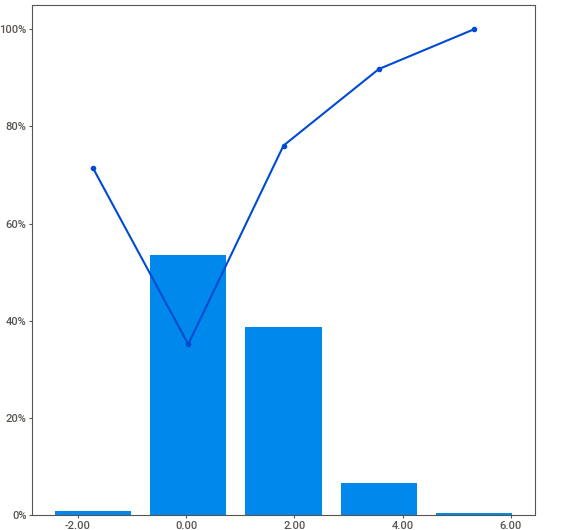
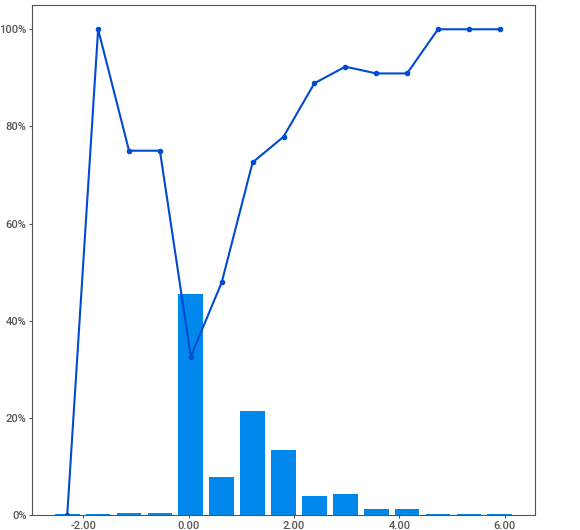
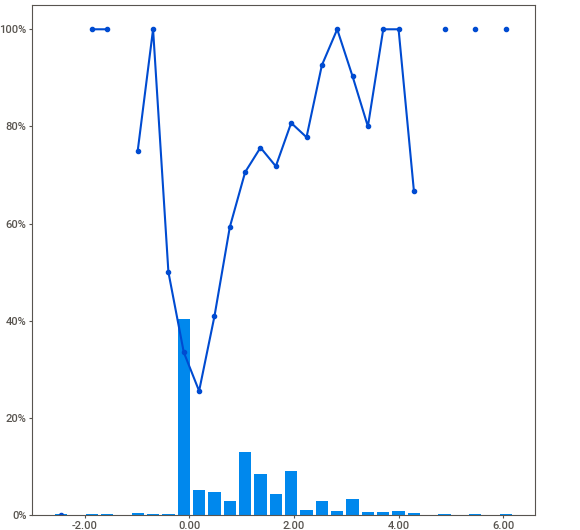
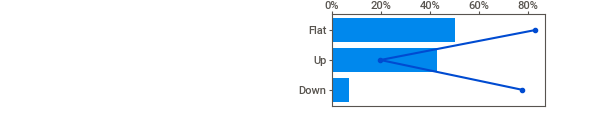
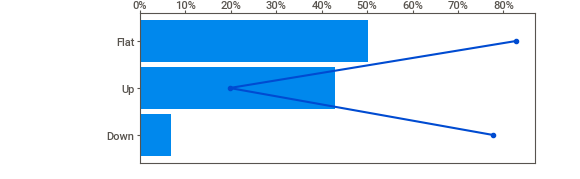
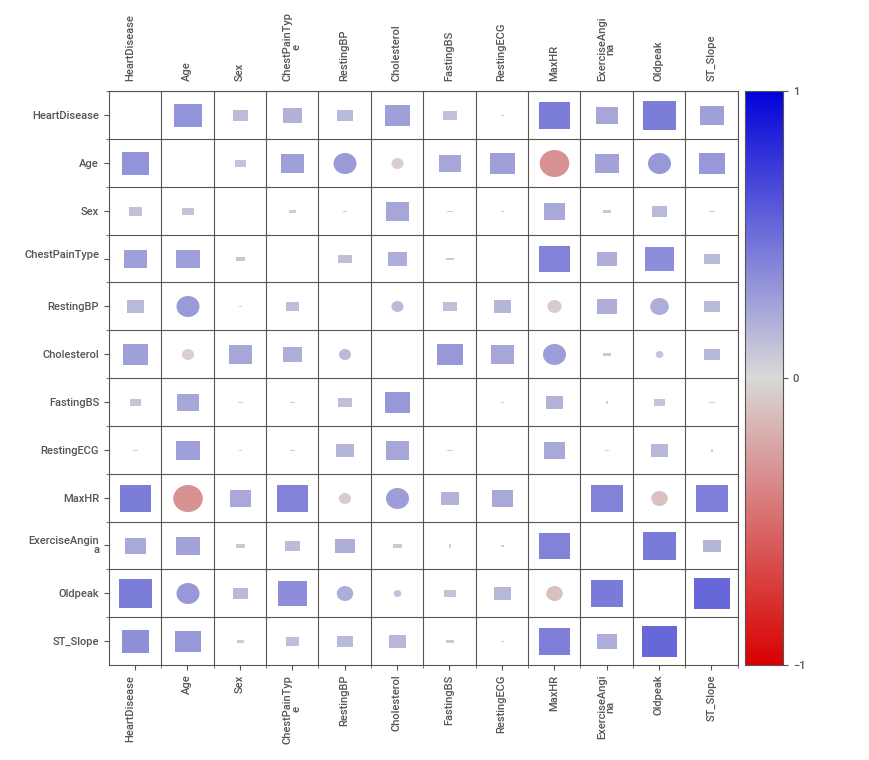
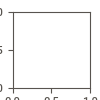

In [ ]:
import sweetviz as sv
eda = sv.analyze(source = data, target_feat = 'HeartDisease')
eda.show_notebook()

In [ ]:
#dados ausentes 
data.isnull().sum()
#Sem dados ausentes

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [ ]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
data['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
X = data.drop('HeartDisease', axis = 1)
y = data['HeartDisease']

In [ ]:
!pip install category_encoders

import category_encoders as ce

In [ ]:
# Testing the Linear Regression model, using only Hashing Encoder
he = ce.HashingEncoder(verbose = 1)
X_he = he.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_he, y, test_size = 0.30, random_state = 42, stratify = y)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr1 = LinearRegression()
lr1.fit(X_train1, y_train1)
previsoes = lr1.predict(X_test1)
print('R2 score : ', r2_score(y_test1, previsoes ))
print('Coeficientes : ',lr1.coef_)

R2 score :  0.47664838109219887
Coeficientes :  [ 1.43081083e-01  7.18175519e-16 -1.38131142e-01 -2.29377278e-01
  9.09273455e-03 -2.74545768e-02  2.42789179e-01  4.51028104e-17
  8.32689877e-04 -4.97344378e-04 -7.08561386e-04  2.06186234e-01
 -3.22198880e-03  1.01235106e-01]


In [ ]:
# Testing the Linear Regression model, using Hashing Encoder and StandardScaler
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_ss = s.fit_transform(X_he)
data2 = pd.DataFrame(X_ss)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size = 0.30, random_state = 42, stratify = y)

In [ ]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
previsoes2 = lr2.predict(X_test)
print('R2 score : ', r2_score(y_test, previsoes2 ))
print('Coeficientes : ',lr2.coef_)

R2 score :  0.4758904885547157
Coeficientes :  [ 3.25995207e+12  5.59622227e+11  4.54299002e+12  2.56973861e+12
  2.07416706e+12  2.71167491e+12  2.05417022e+12 -3.64385635e+10
  7.29370117e-03 -9.36889648e-03 -7.66601562e-02  8.68225098e-02
 -8.05664062e-02  1.07666016e-01]


Polynomial Features

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X_ss)



In [ ]:
las01 = Lasso(alpha = 0.1)
las01.fit(X_pf, y)
print('sum of coefficients:', abs(las01.coef_).sum() )
print('number of coefficients not equal to 0:', (las01.coef_!=0).sum())

sum of coefficients: 0.2513265660035641
number of coefficients not equal to 0: 7


In [ ]:
from sklearn.metrics import r2_score
r2_score(y,las01.predict(X_pf))

0.31573915542307407

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

X_train_s3 = s.fit_transform(X_train3)
las01.fit(X_train_s3, y_train3)
X_test_s3 = s.transform(X_test3)
y_pred3 = las01.predict(X_test_s3)
r2_score(y_pred3, y_test3)

-5.6087600897239325

In [ ]:
from sklearn.linear_model import Ridge
### BEGIN SOLUTION
# Decreasing regularization and ensuring convergence
r = Ridge(alpha = 0.001)
X_train_s = s.fit_transform(X_train3)
r.fit(X_train_s, y_train3)
X_test_s = s.transform(X_test3)
y_pred_r = r.predict(X_test_s)

# Calculating r2 score
print(r2_score(y_pred_r, y_test3))
r.coef_


-0.004646824996983767


array([ 0.1115384 ,  0.        , -0.07970184, -0.07894327,  0.0061715 ,
        0.03138721,  0.0461641 ,  0.        ,  0.01701097, -0.00685707,
       -0.02752811,  0.04001791, -0.06219942,  0.12748311,  0.01412093,
        0.        ,  0.02331877, -0.02050151, -0.02060168, -0.01949763,
       -0.00090337,  0.        , -0.01273851,  0.00691713, -0.00923273,
       -0.01333633,  0.00460105, -0.03604925,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.02338515,  0.00055688, -0.00087628, -0.01210923,
        0.04385033,  0.        , -0.006584  , -0.01783036, -0.01334793,
        0.00632627,  0.02031557,  0.03313877,  0.05021491, -0.0007733 ,
        0.06381537, -0.10385972,  0.        ,  0.01154618,  0.00229715,
        0.00465315, -0.00283781, -0.00603237,  0.00769859, -0.0061715 ,
        0.01921982,  0.01595576,  0.        , -0.00244508, -0.02